In [12]:
import os
import numpy as np
import pandas as pd
from spelt.ephys import ephys
from spelt.session_utils import find_all_sessions, make_df_all_sessions

## Load all session data
# Load pickled data
df_all_sessions = pd.read_pickle('/home/isabella/Documents/isabella/jake/ephys_analysis/processed_data/df_all_cells.pkl')

# Load all session names and paths as dict
session_dict = find_all_sessions(sheet_path = 'https://docs.google.com/spreadsheets/d/1_Xs5i-rHNTywV-WuQ8-TZliSjTxQCCqGWOD2AL_LIq0/edit#gid=0',
                                 data_path = '/home/isabella/Documents/isabella/jake/recording_data',
                                 sorting_suffix = 'sorting_ks2_custom')

# # TESTING Drop all but a single row
# session_dict = {k: session_dict[k] for k in list(session_dict)[10:30]}

df_all_sessions = make_df_all_sessions(session_dict, recording_type = 'nexus' )

bad_animals = ['r1354', 'r1398']

# Drop rows with index string containing any of bad animals
df_all_sessions = df_all_sessions[~df_all_sessions.index.str.contains('|'.join(bad_animals))]

# # Drop rows with no included clusters
# df_all_cells = df_all_cells.dropna()
# print(f'{len(df_all_cells.index)} sessions retained')

df_all_sessions.head()

,ephys_object
230607_r1364,<pyscan.ephys.ephys object at 0x7f67a74ff310>
230608_r1364,<pyscan.ephys.ephys object at 0x7f67a00ef550>
230609_r1364,<pyscan.ephys.ephys object at 0x7f679ffebf70>
230610_r1364,<pyscan.ephys.ephys object at 0x7f67a0165a90>
230611_r1364,<pyscan.ephys.ephys object at 0x7f67a0108580>


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram

def plot_heatmap_spectrogram(lfp_data, sampling_rate, freq_range=None):
    """
    Generates a heatmap spectrogram of channel x frequency, with power as color.
    Frequency is on the x-axis and channel is on the y-axis.

    Parameters:
    - lfp_data: 2D numpy array of LFP data samples, shape (channels, samples).
    - sampling_rate: Sampling rate of the LFP data in Hz.
    - freq_range: Tuple specifying the frequency range to display, e.g., (0, 250).
    """
    num_channels, _ = lfp_data.shape
    power_spectra = []

    # Compute spectrogram for each channel and collect power spectra
    for i in range(num_channels):
        f, t, Sxx = spectrogram(lfp_data[i, :], fs=sampling_rate, nperseg=256, noverlap=128)
        if freq_range:
            freq_mask = (f >= freq_range[0]) & (f <= freq_range[1])
            f = f[freq_mask]
            Sxx = Sxx[freq_mask, :]
        power_spectra.append(Sxx)

    # Assuming all channels have the same frequency bins but might have different time bins
    # Here, we average the power spectra across time bins to simplify
    power_spectra_avg = [np.mean(sxx, axis=1) for sxx in power_spectra]

    # Plotting
    fig, ax = plt.subplots(figsize=(10, 6))
    power_matrix = np.log10(np.array(power_spectra_avg))
    im = ax.imshow(power_matrix, aspect='auto', origin='lower', extent=[f[0], f[-1], 0, num_channels], interpolation='none')
    fig.colorbar(im, ax=ax, label='Power')
    ax.set_xlabel('Frequency (Hz)')
    ax.set_ylabel('Channel')
    ax.set_title('Channel x Frequency Heatmap')
    plt.tight_layout()
    plt.show()

# Example usage:
# plot_heatmap_spectrogram(lfp_data, sampling_rate, freq_range=(0, 250))


Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1364/2023-06-07/230607_r1364_raw_open-field_1.pos
Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1364/2023-06-07/230607_r1364_raw_open-field_2.pos
Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1364/2023-06-07/230607_r1364_raw_t-maze_1.pos
Real PPM artifically set to 615 (t-maze default)
Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1364/2023-06-07/230607_r1364_raw_t-maze_2.pos
Real PPM artifically set to 615 (t-maze default)


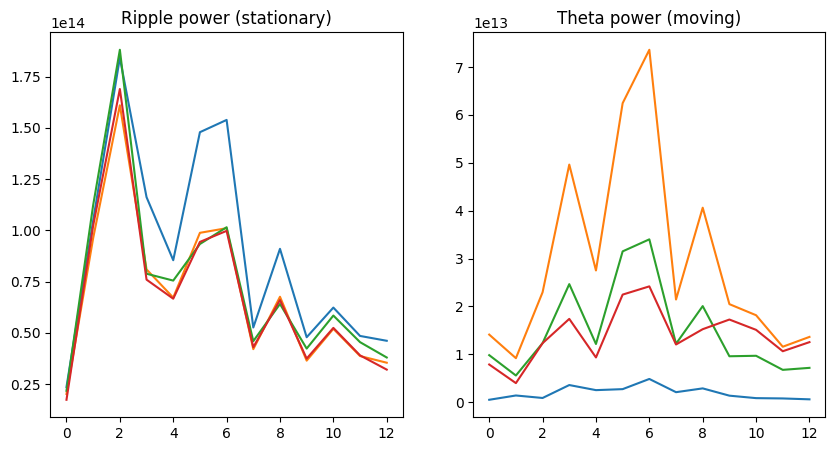

Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1364/2023-06-08/230608_r1364_raw_open-field_1.pos
Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1364/2023-06-08/230608_r1364_raw_t-maze_1.pos
Real PPM artifically set to 615 (t-maze default)
Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1364/2023-06-08/230608_r1364_raw_open-field_2.pos


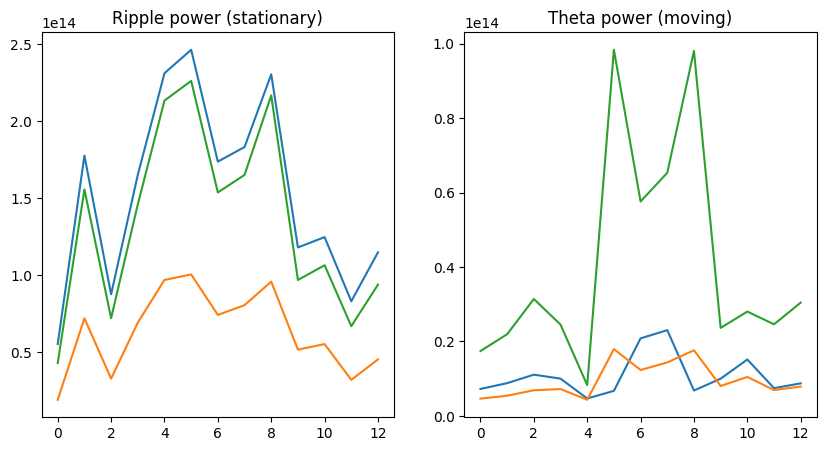

Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1364/2023-06-09/230609_r1364_raw_open-field_1.pos
Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1364/2023-06-09/230609_r1364_raw_t-maze_1.pos
Real PPM artifically set to 615 (t-maze default)
Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1364/2023-06-09/230609_r1364_raw_open-field_2.pos
Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1364/2023-06-09/230609_r1364_raw_t-maze_2.pos
Real PPM artifically set to 615 (t-maze default)


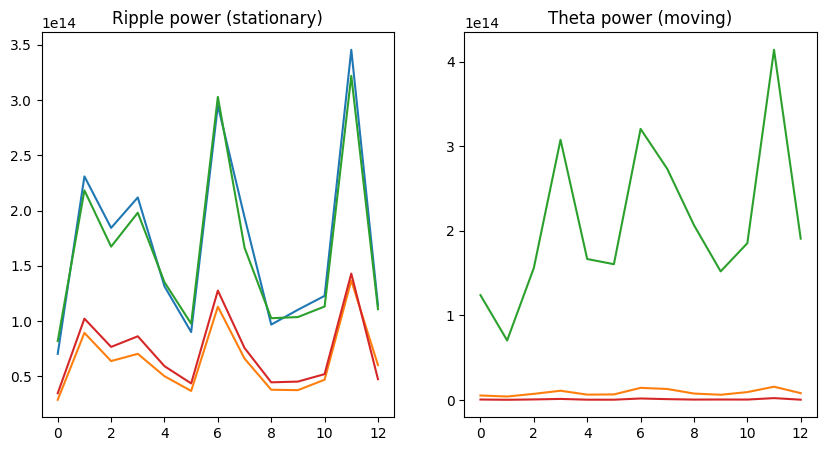

Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1364/2023-06-10/230610_r1364_raw_open-field_1.pos
Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1364/2023-06-10/230610_r1364_raw_t-maze_1.pos
Real PPM artifically set to 615 (t-maze default)
Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1364/2023-06-10/230610_r1364_raw_open-field_2.pos
Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1364/2023-06-10/230610_r1364_raw_t-maze_2.pos
Real PPM artifically set to 615 (t-maze default)


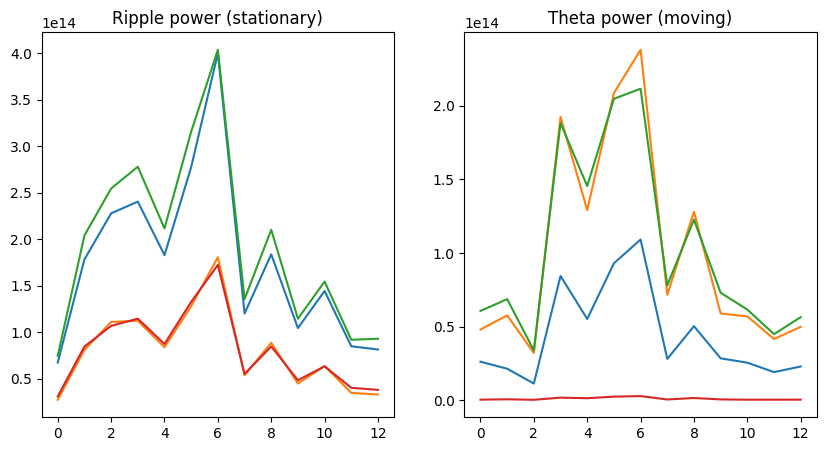

Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1364/2023-06-11/230611_r1364_raw_open-field_1.pos
Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1364/2023-06-11/230611_r1364_raw_t-maze_1.pos
Real PPM artifically set to 615 (t-maze default)
Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1364/2023-06-11/230611_r1364_raw_open-field_2.pos
Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1364/2023-06-11/230611_r1364_raw_t-maze_2.pos
Real PPM artifically set to 615 (t-maze default)


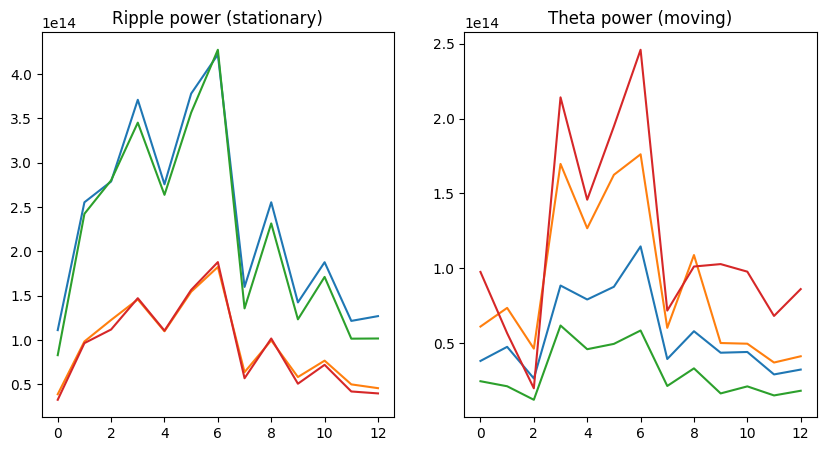

Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1364/2023-06-12/230612_r1364_raw_open-field_1.pos
Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1364/2023-06-12/230612_r1364_raw_t-maze_1.pos
Real PPM artifically set to 615 (t-maze default)
Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1364/2023-06-12/230612_r1364_raw_open-field_2.pos
Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1364/2023-06-12/230612_r1364_raw_t-maze_2.pos
Real PPM artifically set to 615 (t-maze default)


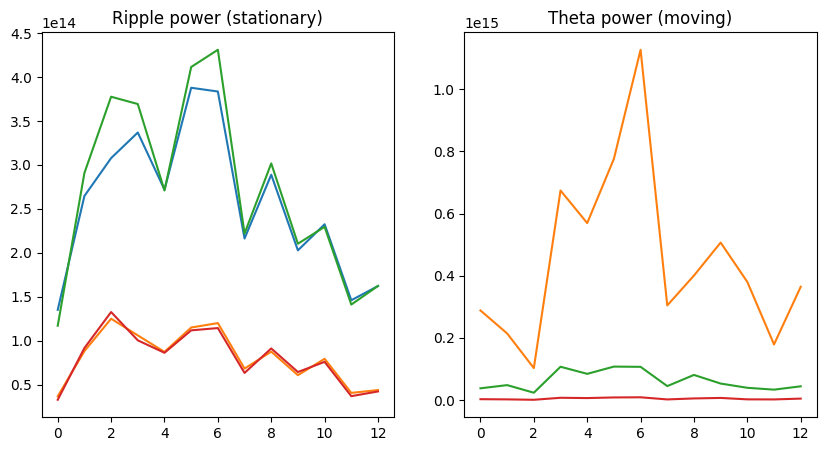

Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1364/2023-06-13/230613_r1364_raw_open-field_1.pos
Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1364/2023-06-13/230613_r1364_raw_t-maze_1.pos
Real PPM artifically set to 615 (t-maze default)
Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1364/2023-06-13/230613_r1364_raw_open-field_2.pos
Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1364/2023-06-13/230613_r1364_raw_t-maze_2.pos
Real PPM artifically set to 615 (t-maze default)


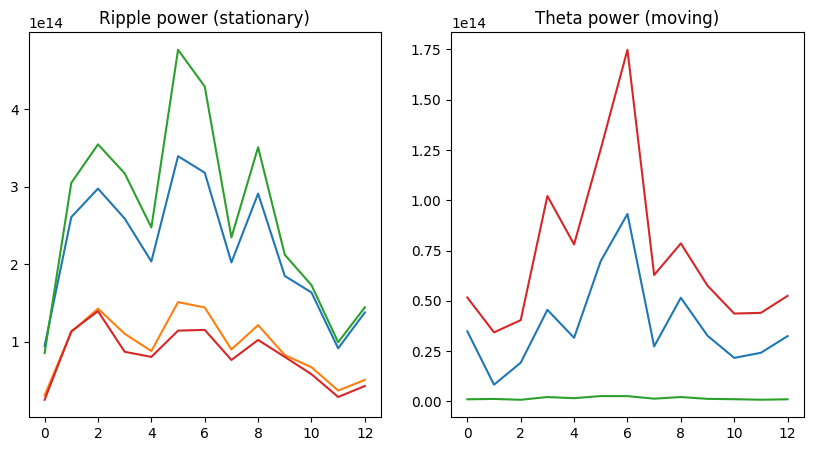

Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1364/2023-06-14/230614_r1364_raw_open-field_1.pos
Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1364/2023-06-14/230614_r1364_raw_t-maze_1.pos
Real PPM artifically set to 615 (t-maze default)
Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1364/2023-06-14/230614_r1364_raw_open-field_2.pos
Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1364/2023-06-14/230614_r1364_raw_t-maze_2.pos
Real PPM artifically set to 615 (t-maze default)


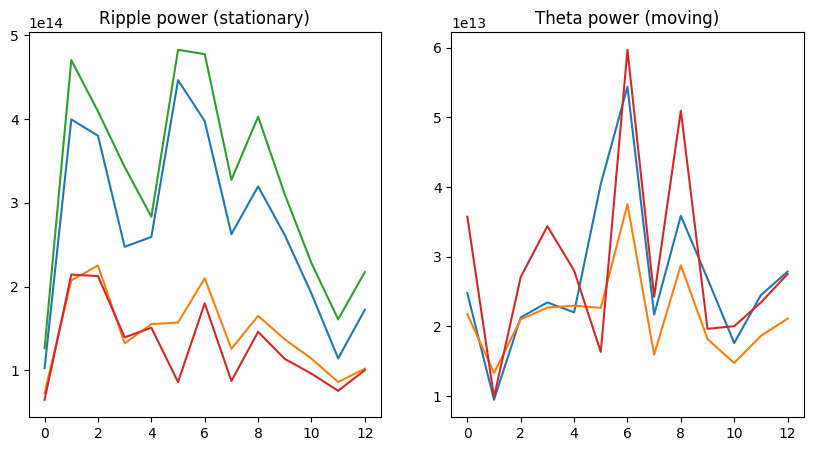

Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1364/2023-06-15/230615_r1364_raw_open-field_1.pos
Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1364/2023-06-15/230615_r1364_raw_t-maze_1.pos
Real PPM artifically set to 615 (t-maze default)
Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1364/2023-06-15/230615_r1364_raw_open-field_2.pos
Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1364/2023-06-15/230615_r1364_raw_t-maze_2.pos
Real PPM artifically set to 615 (t-maze default)


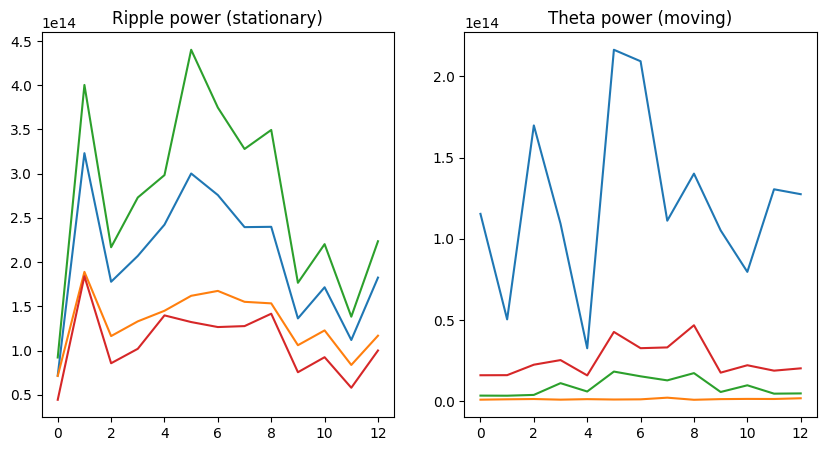

Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1364/2023-06-16/230616_r1364_raw_open-field_1.pos
Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1364/2023-06-16/230616_r1364_raw_t-maze_1.pos
Real PPM artifically set to 615 (t-maze default)
Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1364/2023-06-16/230616_r1364_raw_open-field_2.pos
Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1364/2023-06-16/230616_r1364_raw_t-maze_2.pos
Real PPM artifically set to 615 (t-maze default)


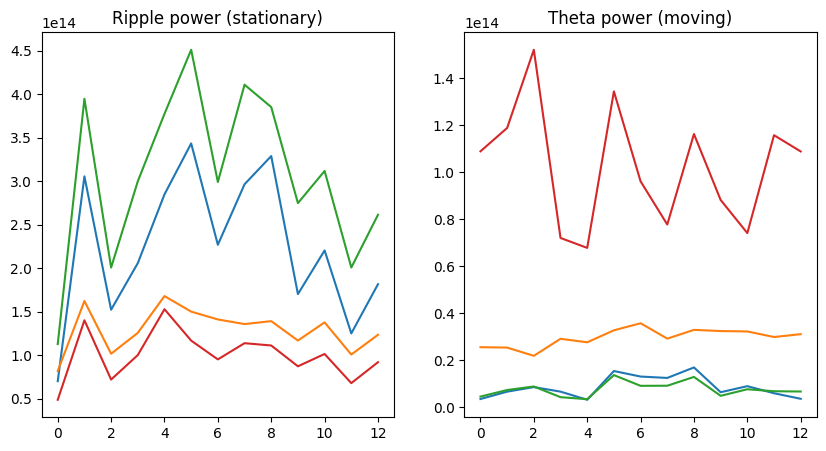

Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1364/2023-06-17/230617_r1364_raw_open-field_1.pos
Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1364/2023-06-17/230617_r1364_raw_t-maze_1.pos
Real PPM artifically set to 615 (t-maze default)
Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1364/2023-06-17/230617_r1364_raw_open-field_2.pos
Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1364/2023-06-17/230617_r1364_raw_t-maze_2.pos
Real PPM artifically set to 615 (t-maze default)


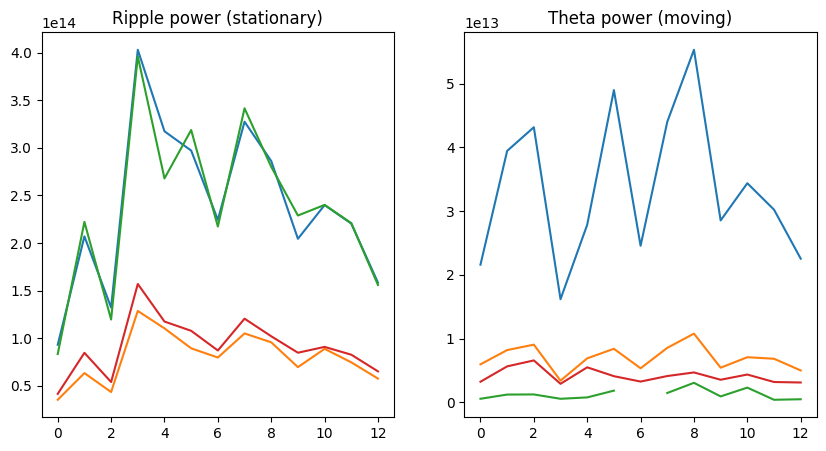

Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1364/2023-06-18/230618_r1364_raw_open-field_1.pos
Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1364/2023-06-18/230618_r1364_raw_t-maze_1.pos
Real PPM artifically set to 615 (t-maze default)
Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1364/2023-06-18/230618_r1364_raw_open-field_2.pos
Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1364/2023-06-18/230618_r1364_raw_t-maze_2.pos
Real PPM artifically set to 615 (t-maze default)


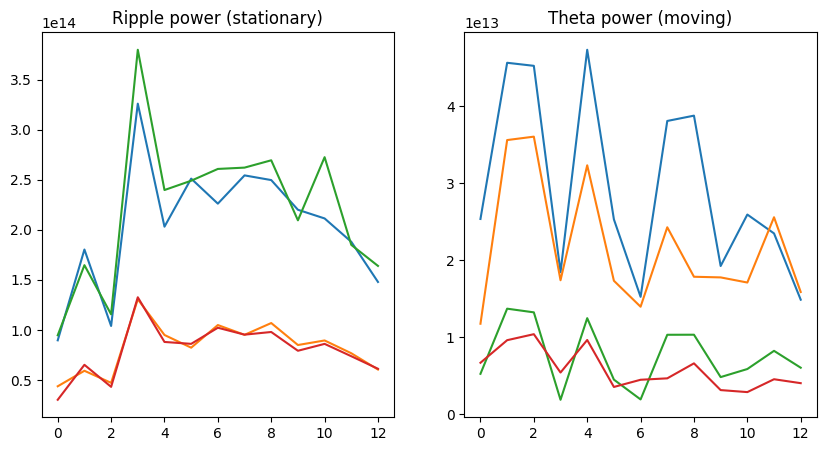

Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1364/2023-06-19/230619_r1364_raw_open-field_1.pos
Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1364/2023-06-19/230619_r1364_raw_t-maze_1.pos
Real PPM artifically set to 615 (t-maze default)
Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1364/2023-06-19/230619_r1364_raw_open-field_2.pos
Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1364/2023-06-19/230619_r1364_raw_t-maze_2.pos
Real PPM artifically set to 615 (t-maze default)


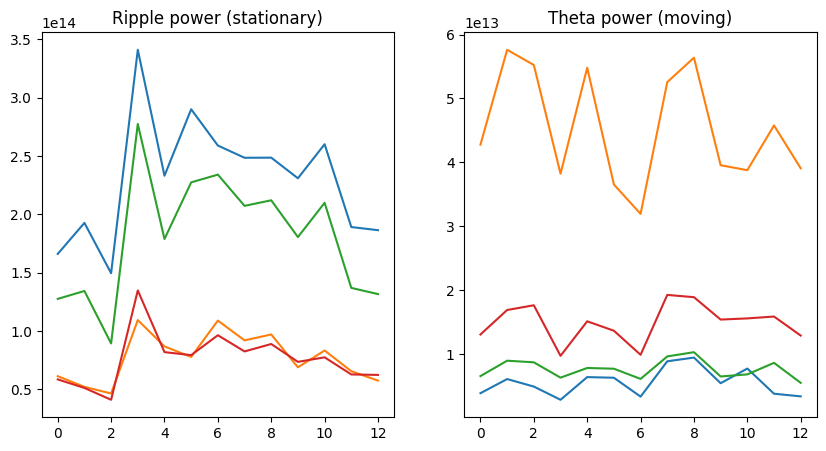

Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1398/2023-07-29/230729_r1398_raw_t-maze_1.pos
Real PPM artifically set to 615 (t-maze default)
Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1398/2023-07-29/230729_r1398_raw_open-field_2.pos
Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1398/2023-07-29/230729_r1398_raw_t-maze_2.pos
Real PPM artifically set to 615 (t-maze default)


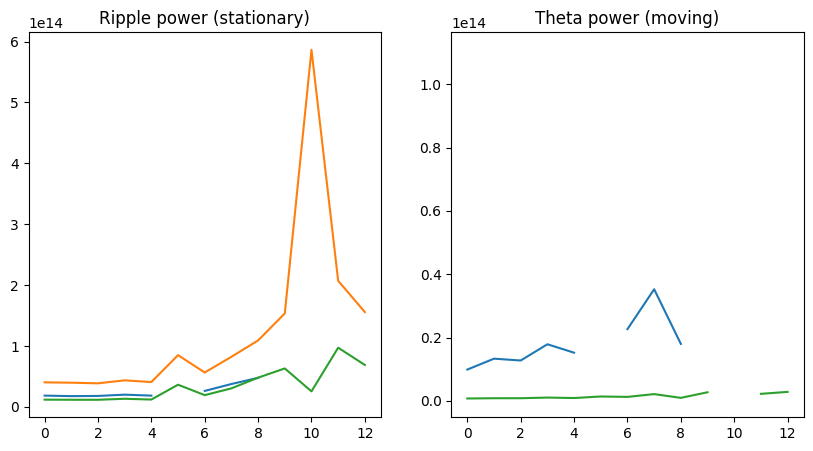

Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1399/2023-07-29/230729_r1399_raw_open-field_1.pos
Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1399/2023-07-29/230729_r1399_raw_t-maze_1.pos
Real PPM artifically set to 615 (t-maze default)
Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1399/2023-07-29/230729_r1399_raw_open-field_2.pos
Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1399/2023-07-29/230729_r1399_raw_t-maze_2.pos
Real PPM artifically set to 615 (t-maze default)


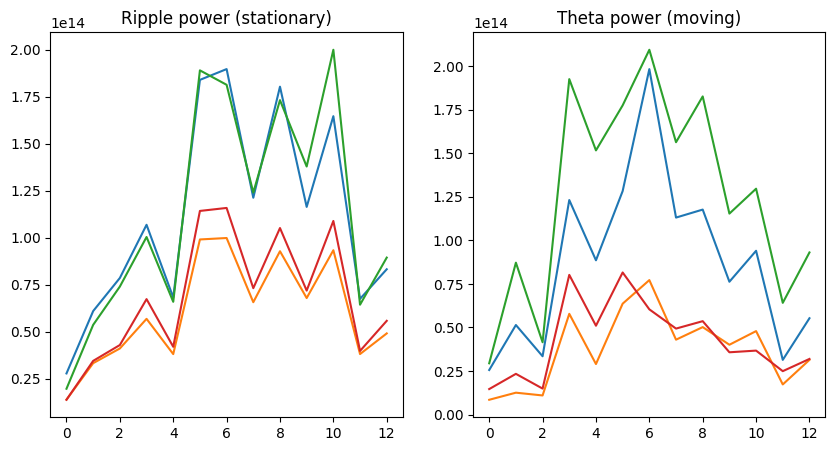

Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1398/2023-07-30/230730_r1398_raw_open-field_2.pos


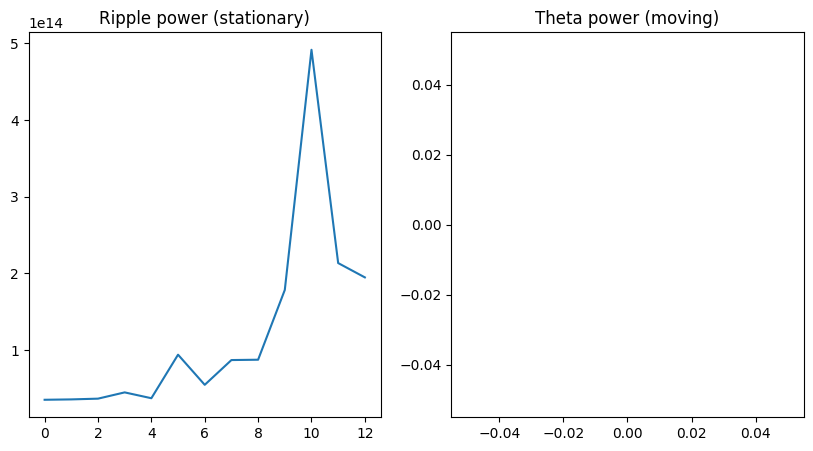

Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1399/2023-07-30/230730_r1399_raw_open-field_1.pos
Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1399/2023-07-30/230730_r1399_raw_t-maze_1.pos
Real PPM artifically set to 615 (t-maze default)
Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1399/2023-07-30/230730_r1399_raw_open-field_2.pos


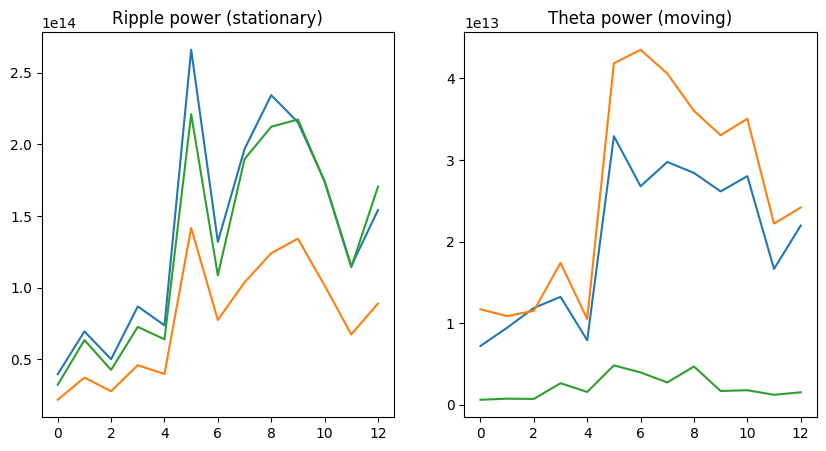

Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1398/2023-07-31/230731_r1398_raw_open-field_1.pos
Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1398/2023-07-31/230731_r1398_raw_t-maze_1.pos
Real PPM artifically set to 615 (t-maze default)


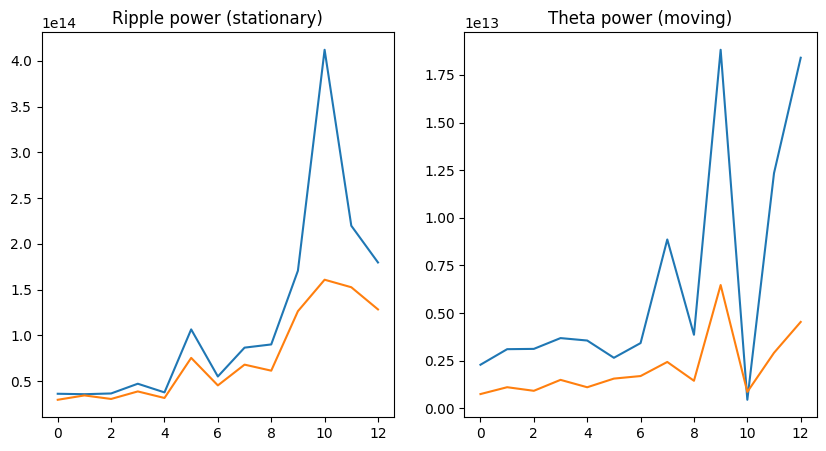

Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1399/2023-07-31/230731_r1399_raw_open-field_1.pos
Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1399/2023-07-31/230731_r1399_raw_t-maze_1.pos
Real PPM artifically set to 615 (t-maze default)
Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1399/2023-07-31/230731_r1399_raw_open-field_2.pos
Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1399/2023-07-31/230731_r1399_raw_t-maze_2.pos
Real PPM artifically set to 615 (t-maze default)


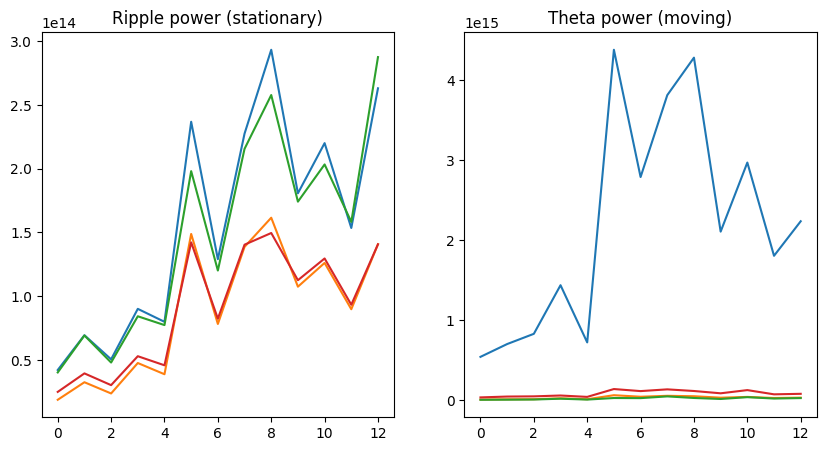

Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1398/2023-08-01/230801_r1398_raw_open-field_1.pos
Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1398/2023-08-01/230801_r1398_raw_t-maze_1.pos
Real PPM artifically set to 615 (t-maze default)
Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1398/2023-08-01/230801_r1398_raw_open-field_2.pos
Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1398/2023-08-01/230801_r1398_raw_t-maze_2.pos
Real PPM artifically set to 615 (t-maze default)


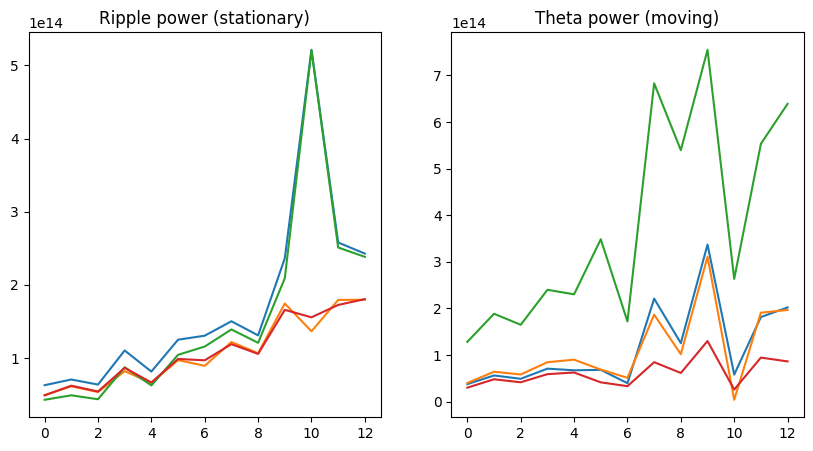

Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1399/2023-08-01/230801_r1399_raw_open-field_1.pos
Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1399/2023-08-01/230801_r1399_raw_t-maze_1.pos
Real PPM artifically set to 615 (t-maze default)
Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1399/2023-08-01/230801_r1399_raw_open-field_2.pos
Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1399/2023-08-01/230801_r1399_raw_t-maze_2.pos
Real PPM artifically set to 615 (t-maze default)


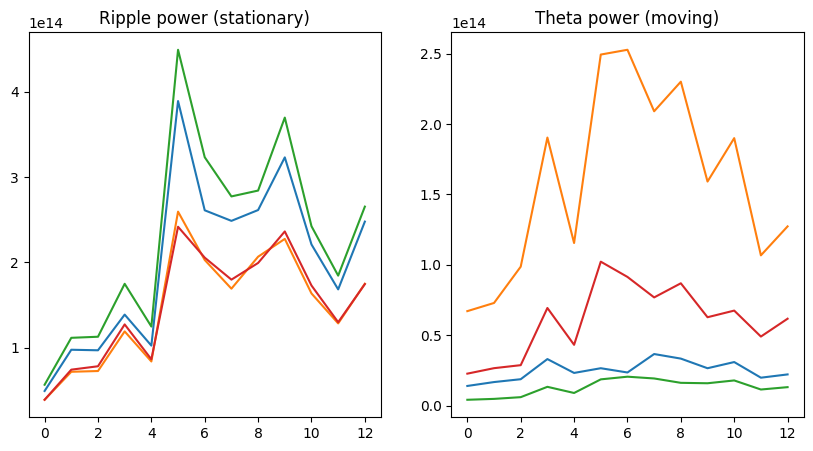

Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1398/2023-08-02/230802_r1398_raw_open-field_1.pos
Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1398/2023-08-02/230802_r1398_raw_t-maze_1.pos
Real PPM artifically set to 615 (t-maze default)
Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1398/2023-08-02/230802_r1398_raw_open-field_2.pos
Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1398/2023-08-02/230802_r1398_raw_t-maze_2.pos
Real PPM artifically set to 615 (t-maze default)


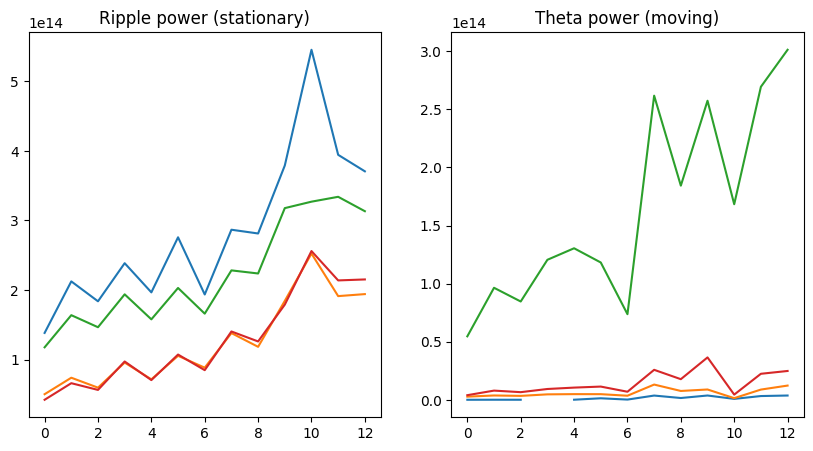

Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1399/2023-08-02/230802_r1399_raw_open-field_1.pos
Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1399/2023-08-02/230802_r1399_raw_open-field_2.pos
Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1399/2023-08-02/230802_r1399_raw_t-maze_2.pos
Real PPM artifically set to 615 (t-maze default)


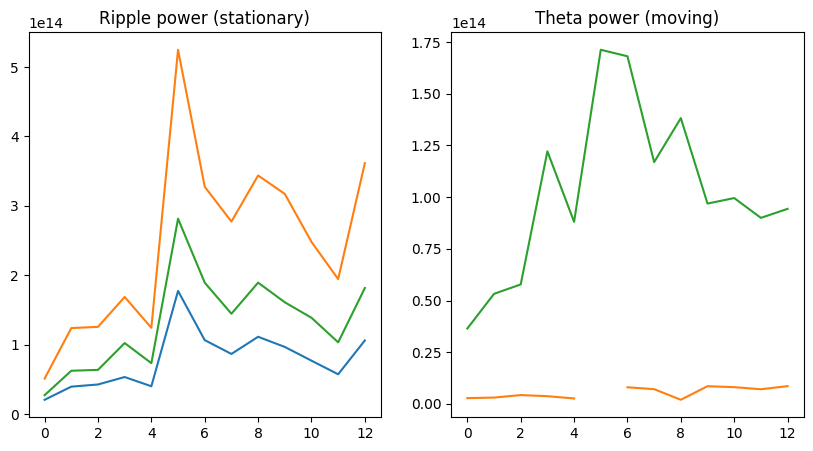

Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1398/2023-08-03/230803_r1398_raw_open-field_1.pos
Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1398/2023-08-03/230803_r1398_raw_t-maze_1.pos
Real PPM artifically set to 615 (t-maze default)
Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1398/2023-08-03/230803_r1398_raw_t-maze_2.pos
Real PPM artifically set to 615 (t-maze default)


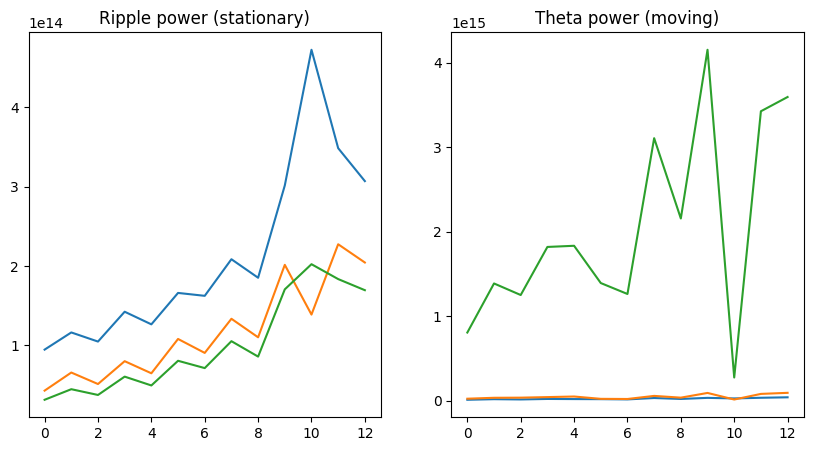

Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1399/2023-08-03/230803_r1399_raw_open-field_1.pos
Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1399/2023-08-03/230803_r1399_raw_t-maze_1.pos
Real PPM artifically set to 615 (t-maze default)


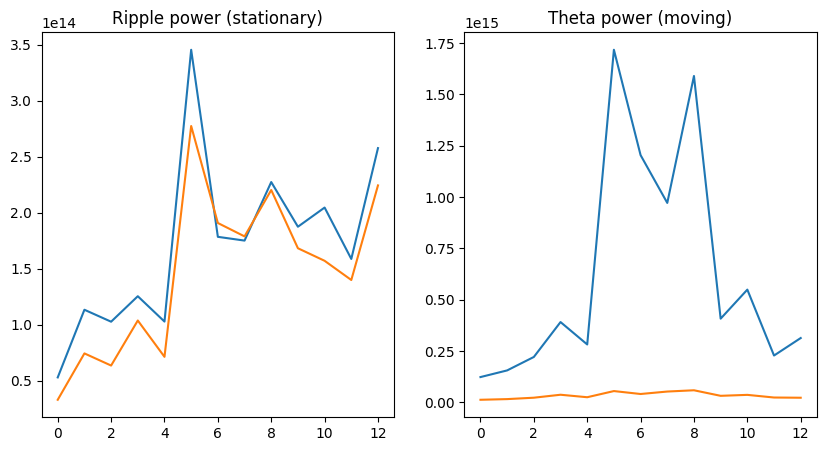

Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1398/2023-08-04/230804_r1398_raw_open-field_1.pos
Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1398/2023-08-04/230804_r1398_raw_t-maze_1.pos
Real PPM artifically set to 615 (t-maze default)


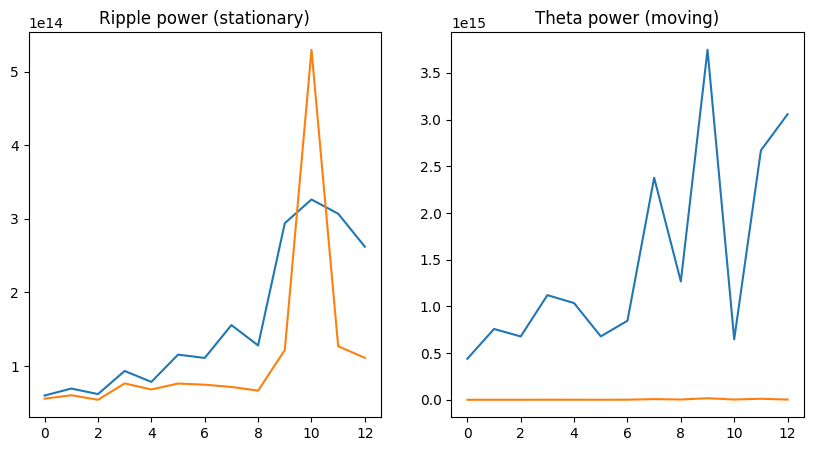

Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1398/2023-08-05/230805_r1398_raw_open-field_1.pos
Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1398/2023-08-05/230805_r1398_raw_t-maze_1.pos
Real PPM artifically set to 615 (t-maze default)
Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1398/2023-08-05/230805_r1398_raw_open-field_2.pos
Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1398/2023-08-05/230805_r1398_raw_t-maze_2.pos
Real PPM artifically set to 615 (t-maze default)


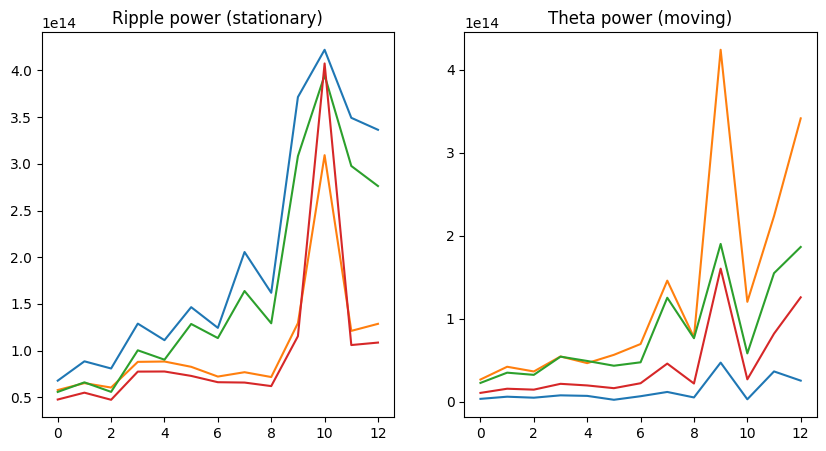

Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1398/2023-08-06/230806_r1398_raw_open-field_1.pos
Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1398/2023-08-06/230806_r1398_raw_t-maze_1.pos
Real PPM artifically set to 615 (t-maze default)
Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1398/2023-08-06/230806_r1398_raw_open-field_2.pos
Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1398/2023-08-06/230806_r1398_raw_t-maze_2.pos
Real PPM artifically set to 615 (t-maze default)


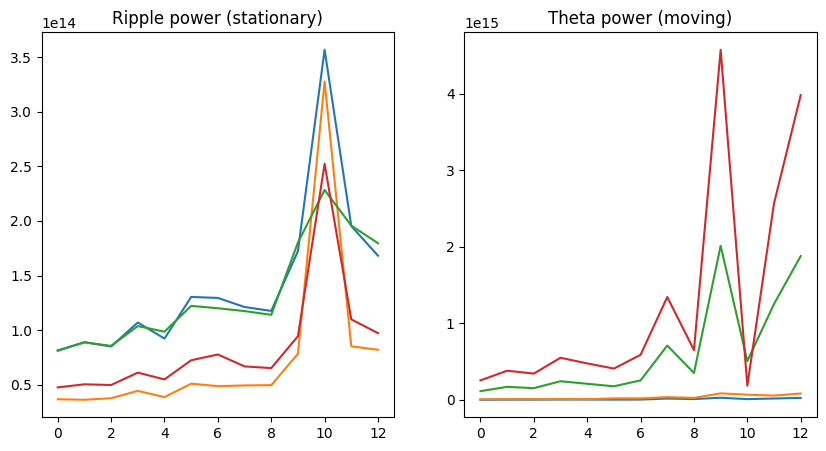

Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1398/2023-08-07/230807_r1398_raw_open-field_1.pos
Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1398/2023-08-07/230807_r1398_raw_t-maze_1.pos
Real PPM artifically set to 615 (t-maze default)
Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1398/2023-08-07/230807_r1398_raw_open-field_2.pos
Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1398/2023-08-07/230807_r1398_raw_t-maze_2.pos
Real PPM artifically set to 615 (t-maze default)


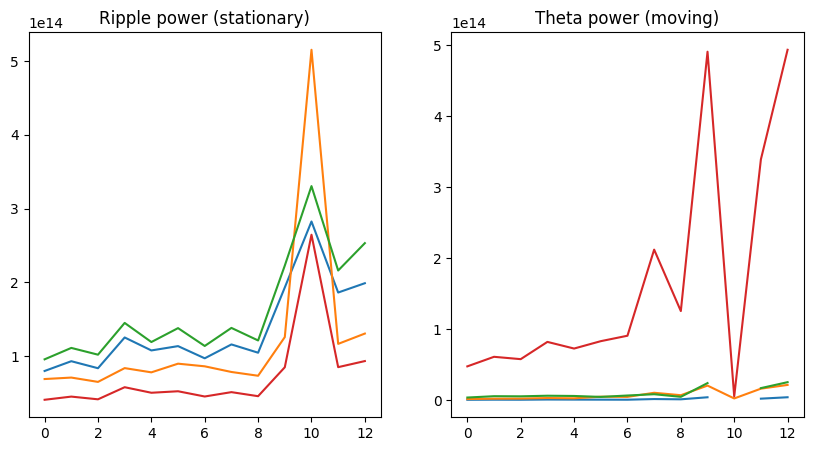

Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1398/2023-08-08/230808_r1398_raw_open-field_1.pos
Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1398/2023-08-08/230808_r1398_raw_t-maze_1.pos
Real PPM artifically set to 615 (t-maze default)
Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1398/2023-08-08/230808_r1398_raw_open-field_2.pos
Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1398/2023-08-08/230808_r1398_raw_t-maze_2.pos
Real PPM artifically set to 615 (t-maze default)


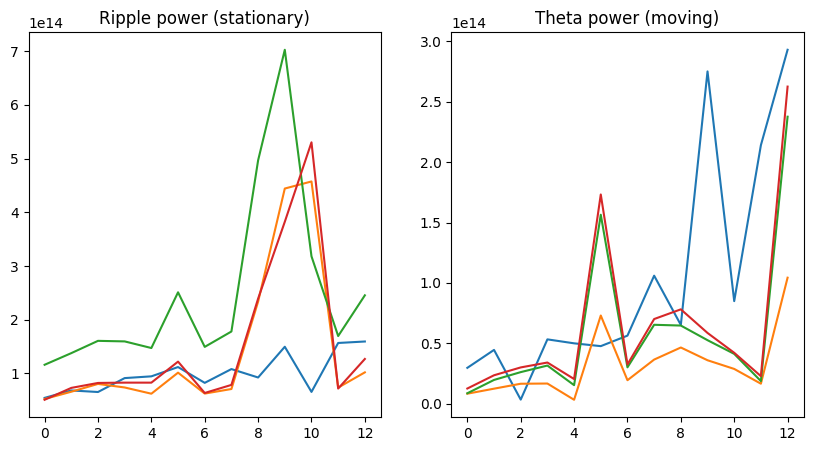

Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1398/2023-08-09/230809_r1398_raw_open-field_1.pos
Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1398/2023-08-09/230809_r1398_raw_t-maze_1.pos
Real PPM artifically set to 615 (t-maze default)
Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1398/2023-08-09/230809_r1398_raw_open-field_2.pos
Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1398/2023-08-09/230809_r1398_raw_t-maze_2.pos
Real PPM artifically set to 615 (t-maze default)


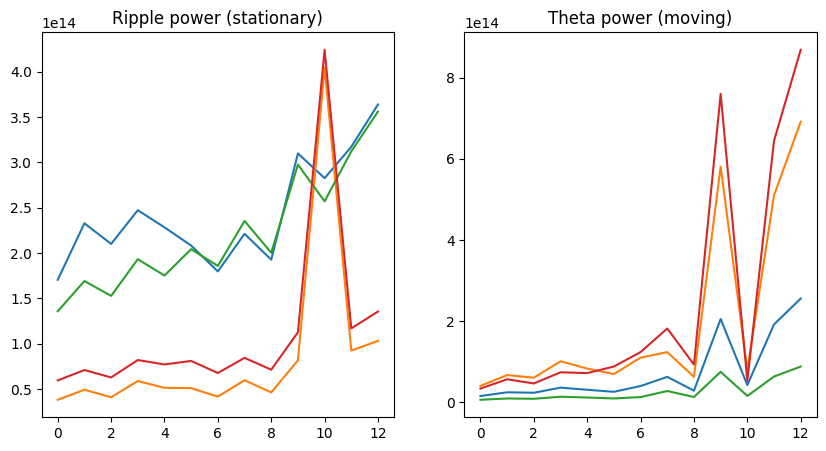

Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1398/2023-08-10/230810_r1398_raw_open-field_1.pos
Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1398/2023-08-10/230810_r1398_raw_t-maze_1.pos
Real PPM artifically set to 615 (t-maze default)
Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1398/2023-08-10/230810_r1398_raw_open-field_2.pos
Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1398/2023-08-10/230810_r1398_raw_t-maze_2.pos
Real PPM artifically set to 615 (t-maze default)


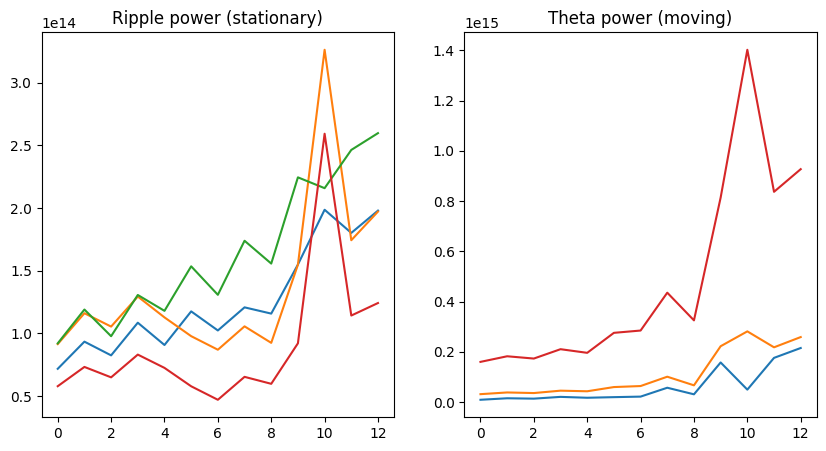

Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1398/2023-08-11/230811_r1398_raw_open-field_1.pos
Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1398/2023-08-11/230811_r1398_raw_t-maze_1.pos
Real PPM artifically set to 615 (t-maze default)


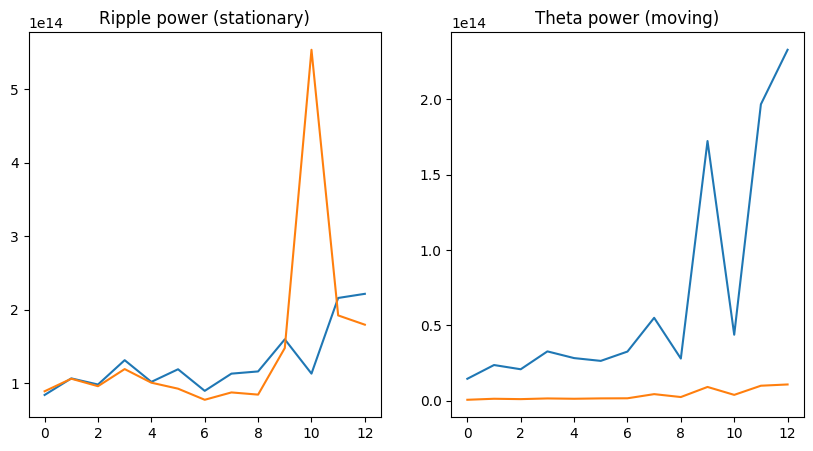

Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1428/2023-10-24/231024_r1428_raw_open-field_1.pos
Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1428/2023-10-24/231024_r1428_raw_t-maze_1.pos
Real PPM artifically set to 615 (t-maze default)
Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1428/2023-10-24/231024_r1428_raw_open-field_2.pos
Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1428/2023-10-24/231024_r1428_raw_t-maze_2.pos
Real PPM artifically set to 615 (t-maze default)


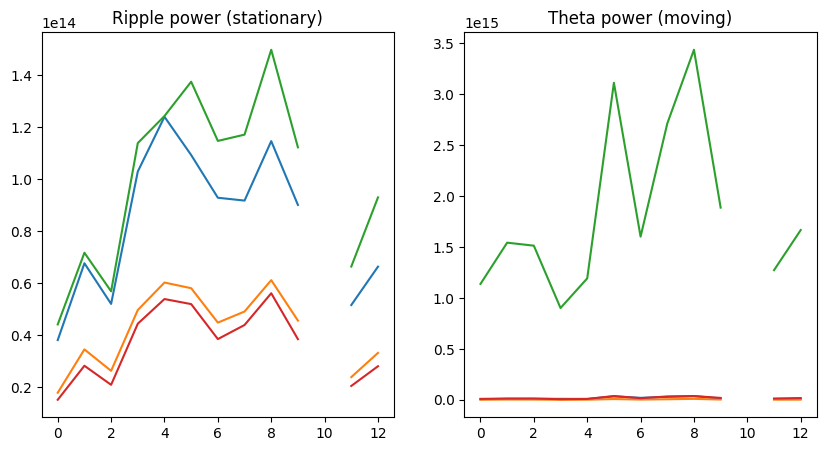

Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1428/2023-10-25/231025_r1428_raw_open-field_1.pos
Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1428/2023-10-25/231025_r1428_raw_t-maze_1.pos
Real PPM artifically set to 615 (t-maze default)
Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1428/2023-10-25/231025_r1428_raw_open-field_2.pos
Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1428/2023-10-25/231025_r1428_raw_t-maze_2.pos
Real PPM artifically set to 615 (t-maze default)


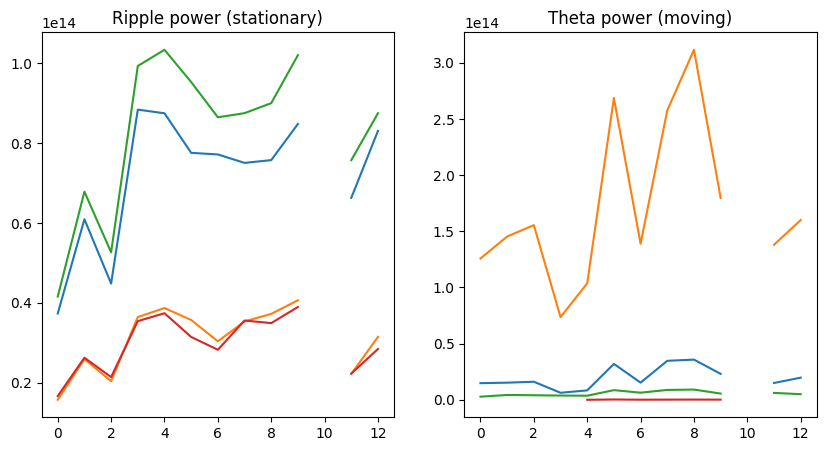

Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1432/2023-10-25/231025_r1432_raw_open-field_1.pos
Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1432/2023-10-25/231025_r1432_raw_t-maze_1.pos
Real PPM artifically set to 615 (t-maze default)
Loading pos file: /home/isabella/Documents/isabella/jake/recording_data/r1432/2023-10-25/231025_r1432_raw_open-field_2.pos


ValueError: A value (900.061) in x_new is above the interpolation range's maximum value (900.06).

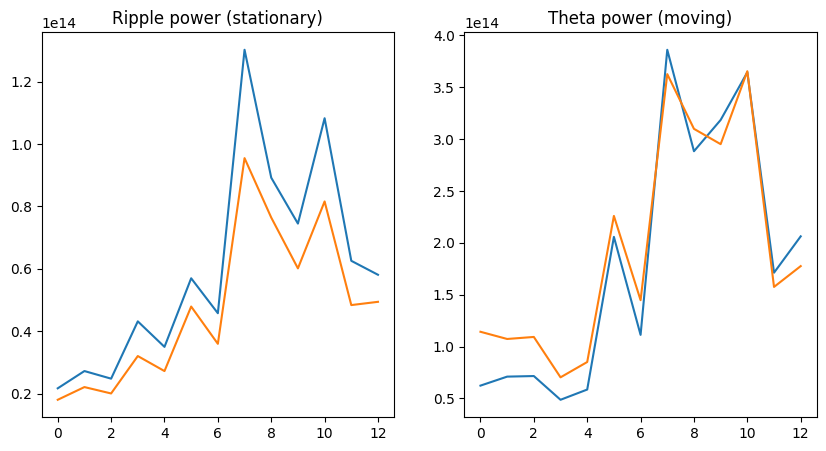

In [14]:
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import fft, fftfreq

def calculate_band_power(lfp_data, sampling_rate, freq_band, clip_mask):
    """
    Calculate the power of a specific frequency band in a 2D array of LFP values.
    
    Parameters:
    - lfp_data: 2D array of shape (samples, channels) with LFP values.
    - sampling_rate: Sampling rate of the LFP data in Hz.
    - freq_band: Tuple specifying the frequency band, e.g., (8, 12) for the alpha band.
    
    Returns:
    - band_power: 1D array of length equal to the number of channels, containing the
      summed power within the specified frequency band for each channel.
    """
    
    # Number of samples
    n_samples = lfp_data.shape[0]
    
    # Compute the FFT for each channel
    fft_vals = fft(lfp_data, axis=0)
    
    # Compute frequencies for each FFT coefficient
    freqs = fftfreq(n_samples, d=1/sampling_rate)
    
    # Identify indices within the desired frequency band
    band_indices = np.where((freqs >= freq_band[0]) & (freqs <= freq_band[1]))[0]

    # Remove indices that are masked
    fft_vals[clip_mask] = np.nan
    
    # Calculate the power spectrum (magnitude squared of FFT coefficients)
    power_spectrum = np.abs(fft_vals)**2
    
    # Sum the power spectrum values within the frequency band for each channel
    band_power = np.nansum(power_spectrum[band_indices, :], axis=0)
    
    return band_power


# Load LFP for central shank and filter to ripple range (150-250Hz)
lfp_sampling_rate = 1000
channels_to_load = [35, 58, 37, 56, 39, 55, 40, 57, 38, 54, 41, 53, 42] # From generate 5x12/16 probe script, corresponding to central shank @0um to -1200um

# channels_to_load = [35] # From generate 5x12/16 probe script, corresponding to central shank @0um

# Loop through sessions
for row, obj in enumerate(df_all_sessions.loc[:, 'ephys_object']):
    
    # Initalise object attribute to store theta phase data
    obj.ripple_data = [{} for _ in range(len(obj.trial_list))]

    fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))
    
    for trial_iterator, trial in enumerate(obj.trial_list):

        # Load LFP for trial 
        obj.load_lfp(trial_iterator,
                        sampling_rate = lfp_sampling_rate, 
                        channels  = channels_to_load, 
                        reload_flag = False, ##CHANGE BACK IF NEEDED
                        scale_to_uv = True,
                        bandpass_filter = None)
        
        obj.load_pos(trial_iterator, reload_flag = False)
                
        lfp_data = obj.lfp_data[trial_iterator]['data']
        clip_mask = obj.lfp_data[trial_iterator]['clip_mask'] #LFP clip mask

        ## Get speed data and align to LFP timestamps
        lfp_timestamps = obj.lfp_data[trial_iterator]['timestamps']
        speed_data = obj.pos_data[trial_iterator]['speed']
        pos_sampling_rate = obj.pos_data[trial_iterator]['pos_sampling_rate']
        num_data_points = len(speed_data)
        # Original timestamps at 50 Hz
        original_timestamps = np.linspace(0, num_data_points/pos_sampling_rate, num=num_data_points, endpoint=True)
        # Create interpolation function
        interpolation_function = interp1d(original_timestamps, speed_data, kind='linear')
        # Interpolate to get new data at 1000 Hz
        resampled_speed_data = interpolation_function(lfp_timestamps)

        # Mask LFP data for speed >2.5 cm/s (theta)
        moving_speed_mask = resampled_speed_data > 2.5
        moving_speed_mask = np.tile(moving_speed_mask[:, np.newaxis], (1, lfp_data.shape[1]))

        # Mask LFP for speed <2.5 cm/s (SWR)
        still_speed_mask = resampled_speed_data < 2.5
        still_speed_mask = np.tile(still_speed_mask[:, np.newaxis], (1, lfp_data.shape[1]))

        # Add speed mask to clip mask
        theta_mask = np.logical_or(clip_mask, moving_speed_mask)
        swr_mask = np.logical_or(clip_mask, still_speed_mask)
        
        # Calculate SWR power across all channels
        ripple_lfp_power = calculate_band_power(lfp_data, lfp_sampling_rate, (100, 250), swr_mask)
        theta_lfp_power = calculate_band_power(lfp_data, lfp_sampling_rate, (4, 12), theta_mask)


        axes[0].plot(np.where(ripple_lfp_power > 1e10, ripple_lfp_power, np.nan))
        axes[0].set_title('Ripple power (stationary)')
        axes[1].plot(np.where(theta_lfp_power > 1e10, theta_lfp_power, np.nan))
        axes[1].set_title('Theta power (moving)')
      
    plt.show()
        # plot_heatmap_spectrogram(lfp_data.T, lfp_sampling_rate, freq_range = (0, 100))
        
    

        